<div class="alert alert-block alert-info">
<span style="font-family:Georgia; font-size:2.0em;"> Summer Program FGV/EMAp 2019</span> <br><br>
<span style="font-family:Georgia; font-size:1.5em;"> INTRODUCTION TO MACHINE LEARNING WITH PYTHON</span> <br><br>
<span style="font-family:Georgia; font-size:1.5em;"> Luis Gustavo Nonato </span> <br>
<span style="font-family:Georgia; font-size:1.0em;">ICMC-USP, Brazil </span>
</div>

# The following Python packages will be used in the Lab Classes:
- pandas
- numpy
- matplotlib
- sklearn
______

---
# This Lab requires the file <font color=blue> domicilios-rio2010.csv </font> 

## <font color=blue> Principal Component Analysis - PCA </font>

In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
###########
# reading data_frame
###########
df = pd.read_csv('domicilios-rio2010.csv')

print('\n columns: \n\n', df.columns)
print('\n original shape: \n', df.shape)

###########
# cleaning the data (remove rows with NaN)   NOT THE BEST PRACTICE TBH
###########

df.dropna(how='any', inplace=True)
print('\n cleaned shape: \n', df.shape)

###########
# converting data columns to numpy array
###########

columns = ['num_Habitantes','AguaADEQUADA', 'EsgotoADEQUADO',
           'Medidor_Eletric', 'LixoADEQUADO', 'Analfa10a14anos', 
           'Analfa15ouMais', 'RespRenda_Ate1Sal', 'RendaPerCapita', 
           'DomRendaMedia']

data = df[columns].values

# data = df[['AguaADEQUADA', 'EsgotoADEQUADO',
#        'Medidor_Eletric', 'LixoADEQUADO', 'Analfa10a14anos', 'Analfa15ouMais',
#        'RespRenda_Ate1Sal', 'RendaPerCapita', 'DomRendaMedia']].values

print('\n shape as numpy array (for scikit.learn usage): \n',data.shape)

# data = df[['AguaADEQUADA', 'EsgotoADEQUADO',
#        'Medidor_Eletric', 'LixoADEQUADO', 'Analfa10a14anos', 'Analfa15ouMais',
#        'RespRenda_Ate1Sal']].values



 columns: 

 Index(['Setor', 'num_Habitantes', 'AguaADEQUADA', 'EsgotoADEQUADO',
       'Medidor_Eletric', 'LixoADEQUADO', 'Analfa10a14anos', 'Analfa15ouMais',
       'RespRenda_Ate1Sal', 'RendaPerCapita', 'DomRendaMedia', 'Classe_Econ'],
      dtype='object')

 original shape: 
 (10230, 12)

 cleaned shape: 
 (10142, 12)

 shape as numpy array (for scikit.learn usage): 
 (10142, 10)


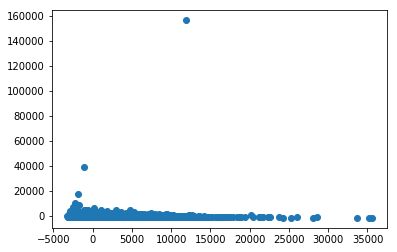

In [23]:
###########
# projecting data in 2D
###########

pca_proj1 = PCA(n_components=2)
data_2d = pca_proj1.fit_transform(data)

plt.scatter( data_2d[:, 0], data_2d[:, 1] )

***
---
## Outliers hamper PCA analysis:

##### identifying outliers and treating them

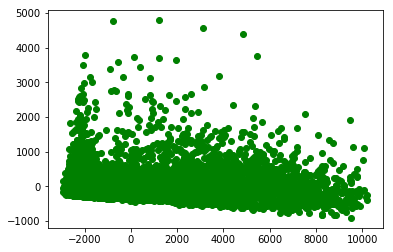

In [35]:
from scipy import stats

###########
# Analyzing and Removing outliers via Z-score method
###########

data_zscore = stats.zscore(data, axis=0)  ## what is the zscore ???

##identify the location of outliers

outliers_ids = np.where(np.abs(data_zscore) > 3)[0]

## find otimized function in pandas
non_outliers_ids = [ i for i in range(data.shape[0]) if i not in outliers_ids ]
data_filtered = data[non_outliers_ids, :]


pca_proj2=PCA(n_components=2)
data_2d_filtered=pca_proj2.fit_transform(data_filtered)

plt.scatter(data_2d_filtered[:,0],data_2d_filtered[:,1], c='g')

[7.34750912e+06 1.84225311e+05 4.00646927e+04 1.24929578e+02
 5.89250203e+01 4.59193682e+01 6.11281756e+00 4.11406834e+00
 2.36861270e+00 1.39556050e+00]

 eigenvalue: 
 [9.70347003e-01 2.43296708e-02 5.29113388e-03 1.64987943e-05
 7.78191846e-06 6.06433017e-06 8.07287762e-07 5.43323433e-07
 3.12810259e-07 1.84304358e-07]


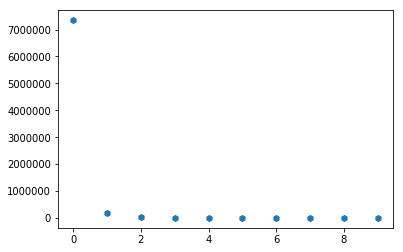

In [40]:
#############
# amount of explained variance; proving the success of the model (covariance tends to zero)
#############

data_pca = PCA( svd_solver='full' )

#data_pca.fit(data[1:])

data_filtered_pca = data_pca.fit(data_filtered)
print( data_filtered_pca.explained_variance_ )
print('\n eigenvalue: \n', data_filtered_pca.explained_variance_ratio_)

plt.plot(data_filtered_pca.explained_variance_, 'h')

In [38]:
#######
# finding the most relevant attributes
#######

print( np.abs( data_filtered_pca.components_[0:2,:] ))

rel_attrib = np.argsort( np.abs( data_filtered_pca.components_[0:2,:] ))
print(rel_attrib.shape)

print( '\n columns: \n', [columns[i] for i in rel_attrib[0:2,0:3].ravel()] )


[[2.81975994e-02 8.61813462e-05 5.19941750e-04 1.26571495e-03
  4.93735833e-05 2.22368493e-04 4.86749938e-04 3.44156222e-03
  3.89438029e-01 9.20613330e-01]
 [9.76689012e-01 4.97964360e-04 1.11433057e-03 1.17054238e-03
  8.24246836e-06 1.75117781e-04 7.37905070e-04 1.50028628e-03
  1.85320006e-01 1.08302280e-01]]
(2, 10)

 columns: 
 ['LixoADEQUADO', 'AguaADEQUADA', 'Analfa10a14anos', 'LixoADEQUADO', 'Analfa10a14anos', 'AguaADEQUADA']
